<a href="https://colab.research.google.com/github/daniel-rojas28/2024-IA/blob/main/Proyecto_1_Modelo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis del problema
El problema consiste en predecir el precio de venta de automóviles usados basado en diversas características del vehículo. Se cuenta con un conjunto de datos que incluye información relevante, como el año de fabricación, el precio original, los kilómetros recorridos, el tipo de combustible, el tipo de vendedor, la transmisión y el número de propietarios anteriores. El objetivo es utilizar estas variables para construir un modelo de predicción que estime de manera precisa el precio de venta de un automóvil, ayudando a compradores y vendedores a tomar decisiones informadas en el mercado de vehículos usados.

# Entendimiento de los datos

Car_Name: Nombre del automóvil (string).

Year: Año del modelo (int).

Selling_Price: Precio de venta del automóvil (float).

Present_Price: Precio original del automóvil (float).

Kms_Driven: Kilómetros recorridos (int).

Fuel_Type: Tipo de combustible (categoría: Petrol, Diesel, CNG).

Seller_Type: Tipo de vendedor (categoría: Dealer, Individual).

Transmission: Tipo de transmisión (categoría: Manual, Automatic).

Owner: Número de propietarios anteriores (int).


#Exploracion de datos

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Cargar el conjunto de datos
data = pd.read_csv('sample_data/car data.csv')

# Convertir variables categóricas a numéricas
label_encoders = {}
categorical_columns = ['Fuel_Type', 'Seller_Type', 'Transmission']

data['Car_Age'] = 2024 - data['Year']


for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Separar las características y la variable objetivo
X = data.drop(columns=['Car_Name', 'Selling_Price'])
y = data['Selling_Price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Modelo Machine learning

In [ ]:
# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')


Mean Squared Error: 3.53
R² Score: 0.85


# Evaluaciones

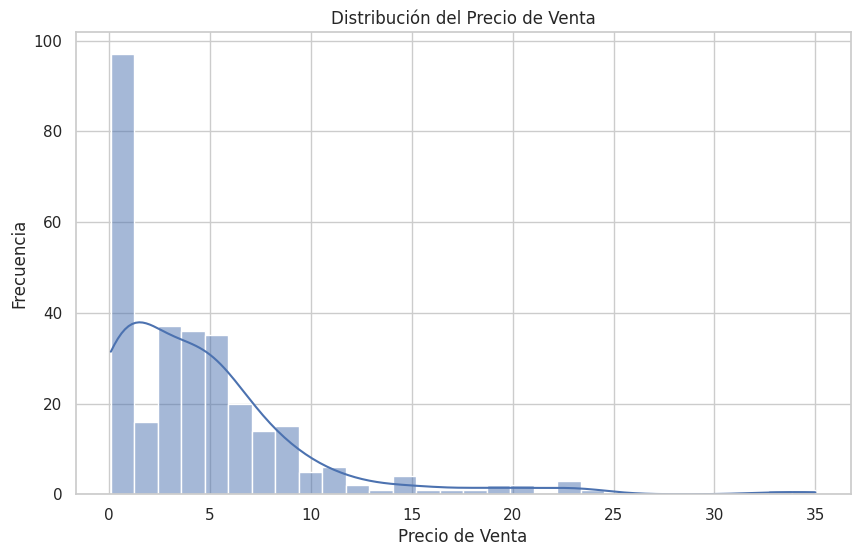

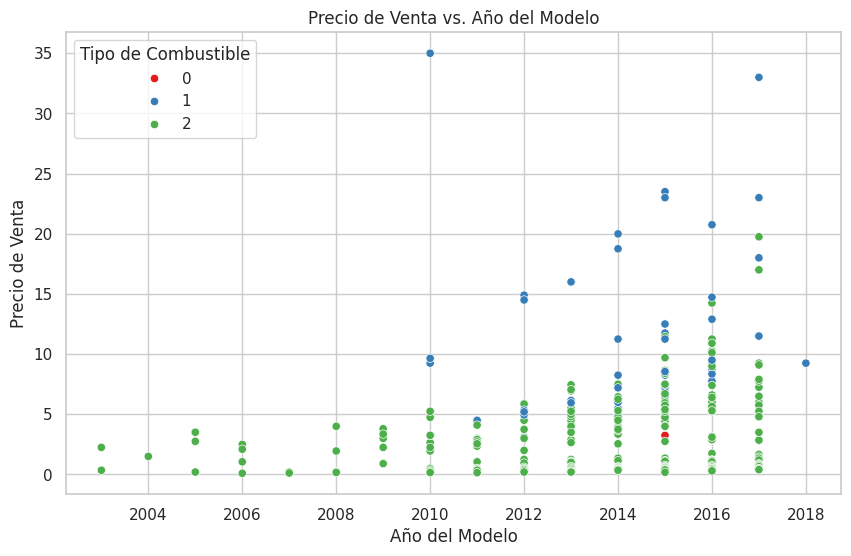

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


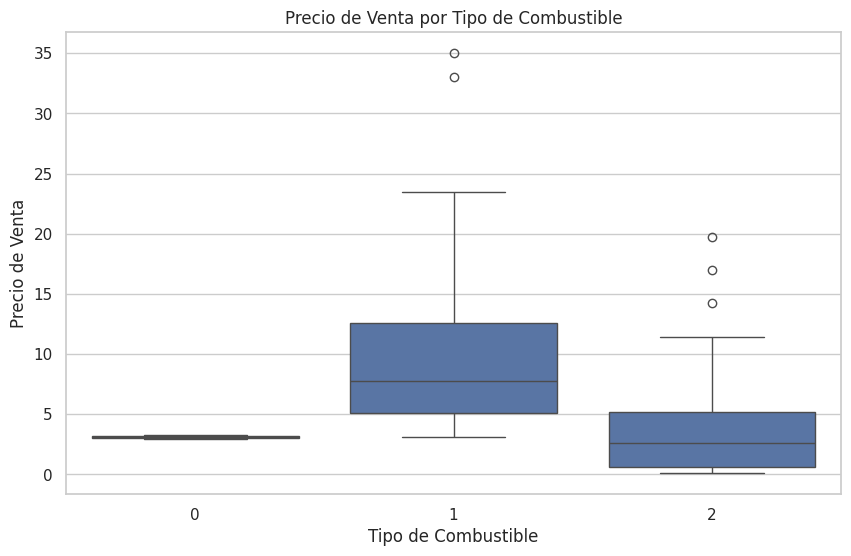

<ipython-input-12-333afbb77a91>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Seller_Type', data=data, palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


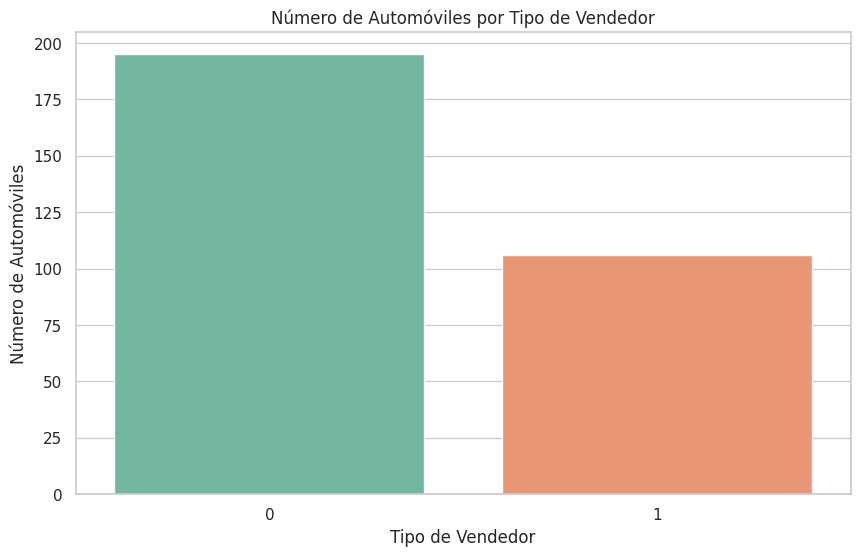

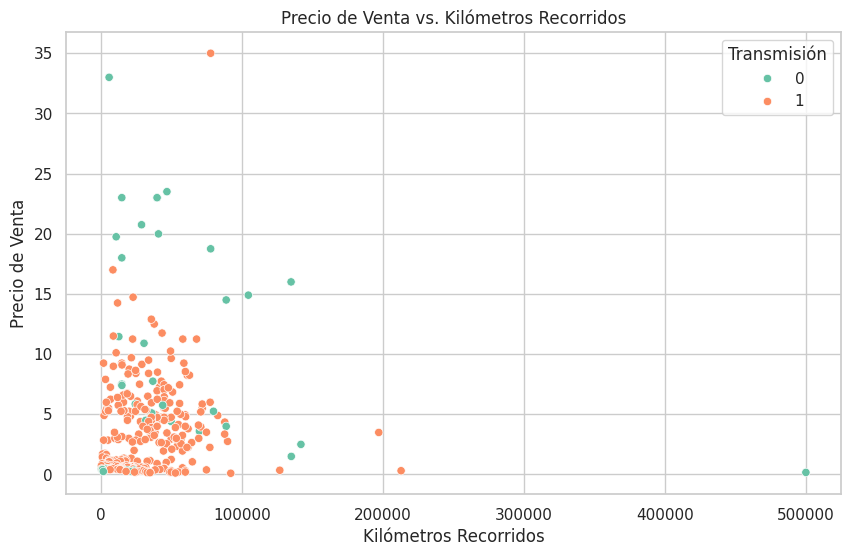

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Configuración de estilo para los gráficos
sns.set(style='whitegrid')

# 1. Histograma del precio de venta
plt.figure(figsize=(10, 6))
sns.histplot(data['Selling_Price'], bins=30, kde=True)
plt.title('Distribución del Precio de Venta')
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.show()

# 2. Gráfico de dispersión entre el precio de venta y el año
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Selling_Price', data=data, hue='Fuel_Type', palette='Set1')
plt.title('Precio de Venta vs. Año del Modelo')
plt.xlabel('Año del Modelo')
plt.ylabel('Precio de Venta')
plt.legend(title='Tipo de Combustible')
plt.show()

# 3. Boxplot del precio de venta por tipo de combustible
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=data)
plt.title('Precio de Venta por Tipo de Combustible')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Precio de Venta')
plt.show()

# 4. Gráfico de barras del número de automóviles por tipo de vendedor
plt.figure(figsize=(10, 6))
sns.countplot(x='Seller_Type', data=data, palette='Set2')
plt.title('Número de Automóviles por Tipo de Vendedor')
plt.xlabel('Tipo de Vendedor')
plt.ylabel('Número de Automóviles')
plt.show()

# 5. Gráfico de dispersión entre kilómetros recorridos y precio de venta
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Kms_Driven', y='Selling_Price', data=data, hue='Transmission', palette='Set2')
plt.title('Precio de Venta vs. Kilómetros Recorridos')
plt.xlabel('Kilómetros Recorridos')
plt.ylabel('Precio de Venta')
plt.legend(title='Transmisión')
plt.show()


# Resultados


El modelo de regresión lineal ajustado para predecir el precio de venta de los automóviles muestra un rendimiento aceptable con un Mean Squared Error (MSE) de 3.53. Esto indica que, en promedio, las predicciones del modelo se desvían en 3.53 unidades del precio real. Además, el R² Score de 0.85 sugiere que el modelo explica aproximadamente el 85% de la variabilidad en los precios de venta, lo que refleja un buen ajuste del modelo. Sin embargo, aunque el modelo captura la mayoría de las variaciones, existe un margen de error que podría mejorarse con técnicas más avanzadas o un mayor refinamiento en el preprocesamiento de los datos.